In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
def get_text():
  path = tf.keras.utils.get_file('nietzsche.txt',
                               origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt') 
  text = open(path).read().lower()
  return text

In [3]:
text_data = get_text()
print("Character length: {0}".format(len(text_data)))

614400/600901 [==============================] - 0s 1us/step
Character length: 600893


In [4]:
print(text_data[:100])

preface


supposing that truth is a woman--what then? is there not ground
for suspecting that all ph


In [5]:
def preprocess_split(text, max_len, step):
  sentences, next_char = [], []
  for i in range(0, len(text) - max_len, step):
    sentences.append(text[i: i + max_len])
    next_char.append(text[i + max_len])
  char_lst = sorted(list(set(text)))
  char_dict = {char: char_lst.index(char) for char in char_lst}
  X = np.zeros((len(sentences), max_len, len(char_lst)), dtype=bool)
  y = np.zeros((len(next_char), len(char_lst)), dtype=bool)
  for i, sentence in enumerate(sentences):
    for j, char in enumerate(sentence):
      X[i, j, char_dict[char]] = 1
    y[i, char_dict[next_char[i]]] = 1
  return X, y, char_dict

In [6]:
max_len = 60
step = 3
X, y, char_dict = preprocess_split(text_data, max_len, step)
vocab_size = len(char_dict)
print("Number of sequences: {0}\nNumber of unique characters: {1}".format(len(X), vocab_size))

Number of sequences: 200278
Number of unique characters: 57


In [9]:
def build_model(max_len, vocab_size):
  inputs = layers.Input(shape=(max_len, vocab_size))
  x = layers.LSTM(128)(inputs)
  output = layers.Dense(vocab_size, activation=tf.nn.softmax)(x)
  model = Model(inputs, output)
  model.compile(optimizer='adam', loss='categorical_crossentropy')
  return model

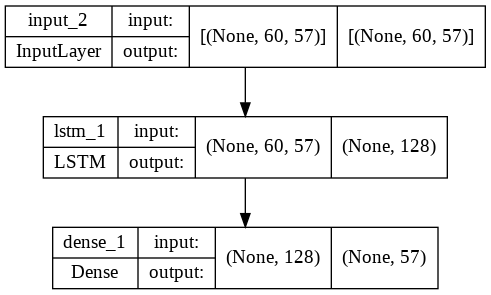

In [10]:
model = build_model(max_len, vocab_size)
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X, y, epochs=50, batch_size=128)

Epoch 1/50
1565/1565 [==============================] - 260s 165ms/step - loss: 2.5614
Epoch 2/50
1565/1565 [==============================] - 259s 166ms/step - loss: 2.2045
Epoch 3/50
1565/1565 [==============================] - 259s 165ms/step - loss: 2.0773
Epoch 4/50
1565/1565 [==============================] - 259s 166ms/step - loss: 1.9878
Epoch 5/50
1565/1565 [==============================] - 258s 165ms/step - loss: 1.9178
Epoch 6/50
1565/1565 [==============================] - 260s 166ms/step - loss: 1.8606
Epoch 7/50
1565/1565 [==============================] - 258s 165ms/step - loss: 1.8127
Epoch 8/50
1565/1565 [==============================] - 260s 166ms/step - loss: 1.7727
Epoch 9/50
1565/1565 [==============================] - 258s 165ms/step - loss: 1.7380
Epoch 10/50
1565/1565 [==============================] - 258s 165ms/step - loss: 1.7073
Epoch 11/50
1565/1565 [==============================] - 260s 166ms/step - loss: 1.6796
Epoch 12/50
1565/1565 [==================

In [11]:
from google.colab import files

model = model.save('model.hdf5')
files.download('model.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
model = load_model('model.hdf5')

In [15]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 57)]          0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               95232     
                                                                 
 dense_1 (Dense)             (None, 57)                7353      
                                                                 
Total params: 102,585
Trainable params: 102,585
Non-trainable params: 0
_________________________________________________________________


In [16]:
def plot_learning_curve(history):
  loss = history.history['loss']
  epochs = [i for i, _ in enumerate(loss)]
  plt.scatter(epochs, loss, color='skyblue')
  plt.xlabel('Epochs'); plt.ylabel('Cross Entropy Loss')
  plt.show()

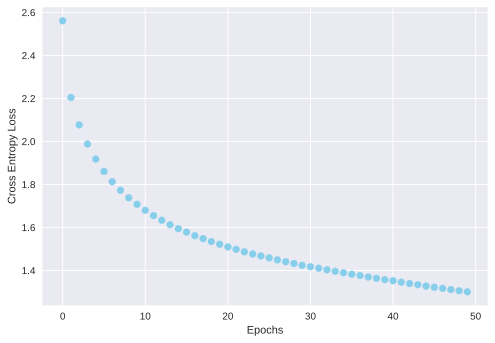

In [ ]:
plot_learning_curve(history)

In [18]:
def random_predict(prediction, temperature):
  prediction = np.asarray(prediction).astype('float64')
  log_pred = np.log(prediction) / temperature
  exp_pred = np.exp(log_pred)
  final_pred = exp_pred / np.sum(exp_pred)
  final_pred = final_pred.flatten()
  random_pred = np.random.multinomial(1, final_pred)
  return random_pred

In [19]:
def generate_text(model, data, iter_num, seed, char_dict, temperature=1, max_len=60):
  entire_text = list(data[seed])
  for i in range(iter_num):
    prediction = random_predict(model.predict(np.array([[entire_text[i: i + max_len]]])[0]), temperature)
    entire_text.append(prediction)
  reverse_char_dict = {value: key for key, value in char_dict.items()}
  generated_text = ''
  for char_vec in entire_text:
    index = np.argmax(char_vec)
    generated_text += reverse_char_dict[index]
  return generated_text

In [20]:
type(X)

numpy.ndarray

In [21]:
entire_text = (X[10])
i=0
print(entire_text)
a = np.array(([[entire_text[i: i + max_len]]])[0])
a
model.predict(a)

[[False  True False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False  True False ... False False False]
 [False False False ... False False False]]


array([[0.01757387, 0.01709705, 0.01756872, 0.01765109, 0.01812501,
        0.01761522, 0.01712231, 0.01706799, 0.01719225, 0.01784713,
        0.01702687, 0.01737085, 0.01800329, 0.01781199, 0.01676529,
        0.01787237, 0.01792331, 0.01791371, 0.01762022, 0.01759606,
        0.01825953, 0.01846415, 0.01739257, 0.01800044, 0.01787337,
        0.01799539, 0.01784233, 0.01744981, 0.01695503, 0.01605169,
        0.01838346, 0.01813188, 0.01756641, 0.0175011 , 0.01785544,
        0.01668737, 0.01709109, 0.01762083, 0.01755355, 0.01693313,
        0.01732364, 0.01720345, 0.0176114 , 0.01736076, 0.01702672,
        0.01780461, 0.01812005, 0.01745737, 0.01726878, 0.01724835,
        0.01750146, 0.01777878, 0.01701827, 0.01781641, 0.01769988,
        0.0177783 , 0.01760868]], dtype=float32)

In [22]:
np.ndarray.flatten(X)

array([False, False, False, ..., False, False, False])

In [23]:
generate_text(model,X,20,3,char_dict)

'\nsupposing that truth is a woman--what then? is there not grh]4o"\n\neäzzj5o0\'ik)p'

# **TURKISH TEXT**

In [24]:
! pip install -q kaggle

In [25]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"geggroup","key":"****"}'}

In [28]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [29]:
!kaggle datasets download ahmetax/hury-dataset --force

 84% 15.0M/17.8M [00:00<00:00, 28.0MB/s]
100% 17.8M/17.8M [00:00<00:00, 29.8MB/s]


In [30]:
from zipfile import ZipFile
  
with ZipFile('hury-dataset.zip', 'r') as zip:
    zip.printdir()
    zip.extractall()

File Name                                             Modified             Size
dunya-nz.txt                                   2019-09-19 22:54:14     56735350


In [31]:
tr_text = open("dunya-nz.txt",encoding="utf8").read().lower()


print(tr_text[:100])

iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere mil


In [33]:
lenght = len(text_data)
lenght

tr_text = tr_text[:lenght]
len(tr_text)

600893

In [34]:
max_len = 60
step = 3
X_tr, y_tr, char_dict_tr = preprocess_split(tr_text, max_len, step)
vocab_size = len(char_dict_tr)
print("Number of sequences: {0}\nNumber of unique characters: {1}".format(len(X_tr), vocab_size))

Number of sequences: 200278
Number of unique characters: 44


In [35]:
def build_model(max_len, vocab_size):
  inputs = layers.Input(shape=(max_len, vocab_size))
  x = layers.LSTM(128)(inputs)
  output = layers.Dense(vocab_size, activation=tf.nn.softmax)(x)
  model = Model(inputs, output)
  model.compile(optimizer='adam', loss='categorical_crossentropy')
  return model

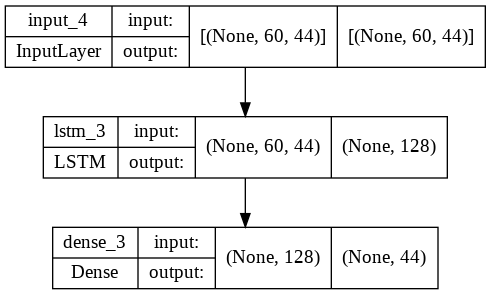

In [37]:
tr_model = build_model(max_len, vocab_size)
plot_model(tr_model, show_shapes=True, show_layer_names=True)

In [38]:
history = tr_model.fit(X_tr, y_tr, epochs=10, batch_size=128)

Epoch 1/10
1565/1565 [==============================] - 240s 152ms/step - loss: 2.4439
Epoch 2/10
1565/1565 [==============================] - 236s 151ms/step - loss: 2.1263
Epoch 3/10
1565/1565 [==============================] - 236s 151ms/step - loss: 2.0069
Epoch 4/10
1565/1565 [==============================] - 237s 151ms/step - loss: 1.9128
Epoch 5/10
1565/1565 [==============================] - 238s 152ms/step - loss: 1.8311
Epoch 6/10
1565/1565 [==============================] - 239s 153ms/step - loss: 1.7623
Epoch 7/10
1565/1565 [==============================] - 239s 153ms/step - loss: 1.7038
Epoch 8/10
1565/1565 [==============================] - 238s 152ms/step - loss: 1.6538
Epoch 9/10
1565/1565 [==============================] - 238s 152ms/step - loss: 1.6125
Epoch 10/10
1565/1565 [==============================] - 238s 152ms/step - loss: 1.5761


In [39]:
generate_text(tr_model,X_tr,20,3,char_dict_tr)

'et televizyonu ülkedeki eyaletin sinde yapılan reformcuları biriştirmeşinceki ha'